In [1]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 6.1 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.5/200.5 kB 9.9 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488496 sha256=4990c4602d534923078da8e86906cd651c00e814153a3aac0478b3df2d8fa844
  Stored in directory: /Users/ezrellemyhre-hager/Library/Caches/pip/wheels/95/13/41/f7f135ee114175605fb4f0a89e7389f3742aa6c1e1a5bcb657
Successfully built pyspark
Note: you may need to restart the kernel to use updated packages.


In [3]:
from ucimlrepo import fetch_ucirepo
import numpy as np

# fetch dataset
poker_hand = fetch_ucirepo(id=158)

# data (as pandas dataframes)
X = poker_hand.data.features
y = poker_hand.data.targets
y_reshaped = np.ravel(y)

In [4]:
# metadata
print(poker_hand.metadata)

{'uci_id': 158, 'name': 'Poker Hand', 'repository_url': 'https://archive.ics.uci.edu/dataset/158/poker+hand', 'data_url': 'https://archive.ics.uci.edu/static/public/158/data.csv', 'abstract': 'Purpose is to predict poker hands', 'area': 'Games', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1025010, 'num_features': 10, 'feature_types': ['Categorical', 'Integer'], 'demographics': [], 'target_col': ['CLASS'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2002, 'last_updated': 'Sat Mar 09 2024', 'dataset_doi': '10.24432/C5KW38', 'creators': ['Robert Cattral', 'Franz Oppacher'], 'intro_paper': None, 'additional_info': {'summary': 'Each record is an example of a hand consisting of five playing cards drawn from a standard deck of 52. Each card is described using two attributes (suit and rank), for a total of 10 predictive attributes. There is one Class attribute that describes the "Poker Hand". T

In [5]:
# variable information
print(poker_hand.variables)

     name     role     type demographic description units missing_values
0      S1  Feature  Integer        None        None  None             no
1      C1  Feature  Integer        None        None  None             no
2      S2  Feature  Integer        None        None  None             no
3      C2  Feature  Integer        None        None  None             no
4      S3  Feature  Integer        None        None  None             no
5      C3  Feature  Integer        None        None  None             no
6      S4  Feature  Integer        None        None  None             no
7      C4  Feature  Integer        None        None  None             no
8      S5  Feature  Integer        None        None  None             no
9      C5  Feature  Integer        None        None  None             no
10  CLASS   Target  Integer        None        None  None             no


In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [7]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_reshaped, random_state=78)

In [8]:
# Creating StandardScaler instance
scaler = StandardScaler()

In [9]:
# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

In [10]:
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [11]:
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

In [12]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

In [13]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

In [15]:
# Calculating the confusion matrix
import pandas as pd
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1", "Actual 2", "Actual 3", "Actual 4", "Actual 5", "Actual 6", "Actual 7", "Actual 8", "Actual 9"], columns=["Predicted 0", "Predicted 1", "Predicted 2", "Predicted 3", "Predicted 4", "Predicted 5", "Predicted 6", "Predicted 7", "Predicted 8", "Predicted 9"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [16]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1,Predicted 2,Predicted 3,Predicted 4,Predicted 5,Predicted 6,Predicted 7,Predicted 8,Predicted 9
Actual 0,117974,10406,0,0,0,0,0,0,0,0
Actual 1,31824,76199,99,10,11,0,0,0,0,0
Actual 2,176,11807,308,15,0,0,0,0,0,0
Actual 3,44,5069,25,330,0,0,2,0,0,0
Actual 4,33,999,0,0,8,0,0,0,0,0
Actual 5,402,5,0,0,0,82,0,0,0,0
Actual 6,0,289,39,20,0,0,5,0,0,0
Actual 7,0,39,5,21,0,0,0,0,0,0
Actual 8,0,4,0,0,0,2,0,0,0,0
Actual 9,0,0,0,0,0,1,0,0,0,0


Accuracy Score : 0.7605998759038919
Classification Report
              precision    recall  f1-score   support

           0       0.78      0.92      0.85    128380
           1       0.73      0.70      0.72    108143
           2       0.65      0.03      0.05     12306
           3       0.83      0.06      0.11      5470
           4       0.42      0.01      0.02      1040
           5       0.96      0.17      0.29       489
           6       0.71      0.01      0.03       353
           7       0.00      0.00      0.00        65
           8       0.00      0.00      0.00         6
           9       0.00      0.00      0.00         1

    accuracy                           0.76    256253
   macro avg       0.51      0.19      0.21    256253
weighted avg       0.75      0.76      0.73    256253



/Users/ezrellemyhre-hager/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ezrellemyhre-hager/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ezrellemyhre-hager/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

## Feature Importance

In [17]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.146122509126584, 'C3'),
 (0.14547855675065025, 'C2'),
 (0.14435348371585002, 'C5'),
 (0.14377957732010765, 'C4'),
 (0.14264187639620374, 'C1'),
 (0.05628625953322093, 'S4'),
 (0.05587479765850735, 'S1'),
 (0.05562390736179966, 'S3'),
 (0.05515135827641007, 'S5'),
 (0.054687673860666475, 'S2')]

<Axes: title={'center': 'Features Importances'}, ylabel='1'>

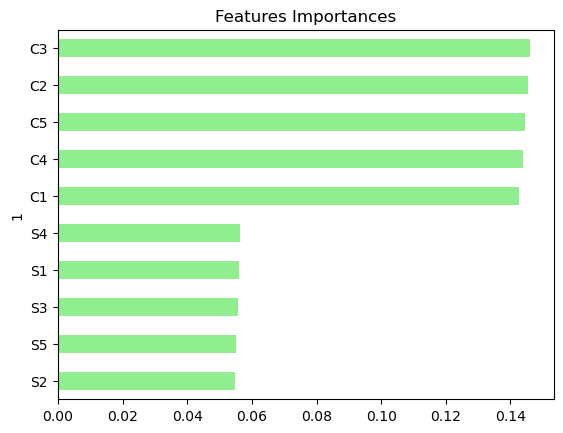

In [18]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)